In [59]:
import pandas as pd
import numpy as np
import ruptures as rpt
import plotly.io as pio
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
import matplotlib.pyplot as plt

pio.templates.default = "seaborn"
pd.options.plotting.backend = "plotly"
pio.templates["plotly"].layout.colorway = px.colors.qualitative.Alphabet

%matplotlib inline
%run global.ipynb

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [40]:
%store -r week_df
df = week_df

In [41]:
df['hour'] = [int(i) for i in df.hour]
df.sort_values(['hour'], ascending = [True], inplace = True)

In [42]:
def plot_weekdays(title, users):
    steps = users.groupby(['hour','series', 'period']).median().unstack('series')['steps']
    plot = steps.plot.line(markers=False, line_shape='spline', height=400, title=title)
    
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for day in range(0,7):
        start = day * 24
        end = start + 23
        stepsBefore = steps['Before'][start:end].sum()
        stepsAfter = steps['During'][start:end].sum()
        offset = start + 2
        
        annotate_diff(plot, offset, 600, 50, days[day], stepsBefore, stepsAfter)

    return go.FigureWidget(plot)

def day_type_list():
    return [
        {
            'name': 'all',
            'start': 0,
            'end': 24 * 7,
        },
        {
            'name': 'weekday',
            'start': 0,
            'end': 24 * 5,
        },
        {
            'name': 'weekend',
            'start': 24 * 5,
            'end': 24 * 7,
        }
    ]

def week_list():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    _list = []
    for i, day in enumerate(days):
        _list.append({
            'start': 24 * i,
            'end': (24 * i) + 24,
            'name': day
        })
    return _list

In [60]:
def show_plot(data, title):
    steps = data.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0]
    plot = steps.plot.line(markers=False, line_shape="spline", height=200, title=format_title(title), color_discrete_sequence=[before_color, during_color])

    ranges = week_list()

    plot.update_layout(xaxis = dict(
        tickvals = [0, 24, 48,72,96,120,144],
        ticktext = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    ), yaxis_title="Steps", xaxis_title="Hour of day", legend_title=None)

    diffs = []

    for range in ranges:
        start = range['start']
        end = range['end']
        stepsBefore = steps['Before'][start:end].sum()
        stepsAfter = steps['During'][start:end].sum()
        diffs.append(stepsAfter - stepsBefore)

        annotate_diff(plot, start + 2, 500, 50, '', stepsBefore, stepsAfter)

    style_plot(plot)
    plot.update_layout(height=300)
    
    plot.show()

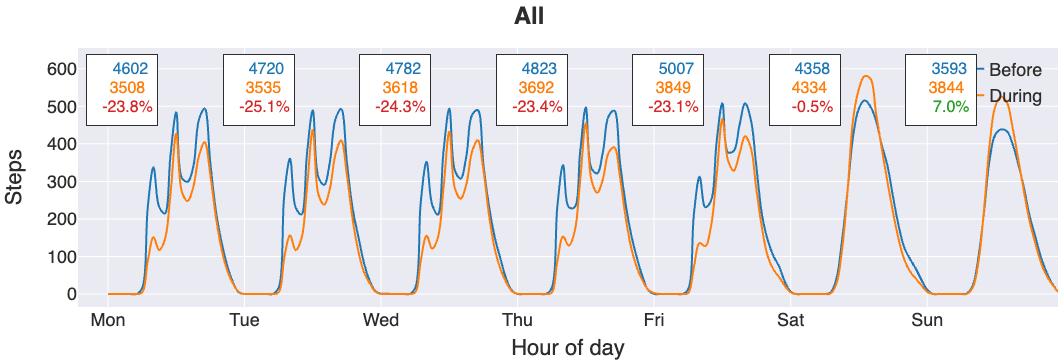

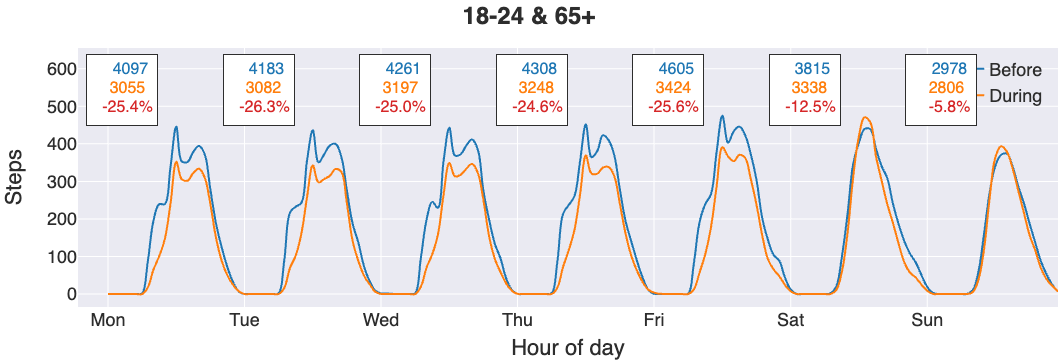

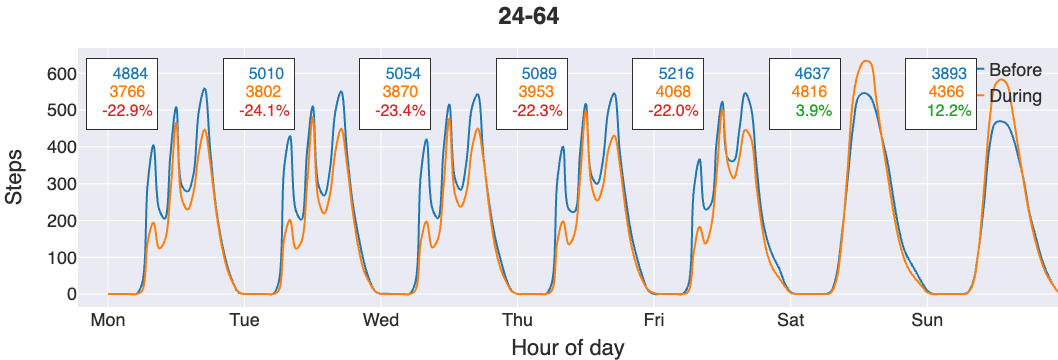

<Figure size 450x150 with 0 Axes>

In [61]:
plt.gcf().set_size_inches(600/96, 200/96)

# users = df[df['work_age'] == True]
show_plot(df, 'All')
show_plot(df[df['work_age'] == False], '18-24 & 65+')
show_plot(df[df['work_age'] == True], '24-64')

In [52]:
avgBefore = (4602 + 4720 + 4782 + 4823 + 5007 + 4358 + 3593) / 7
avgAfter = (3508 + 3535 + 3618 + 3692 + 3849 + 4334 + 3844) / 7

1 - avgAfter / avgBefore

0.17265171710835814

In [17]:
#workers = df[df['work_age'] == True]
#non_workers = df[df['work_age'] == False]

#widgets.VBox([plot_weekdays('All', df), plot_weekdays('Workers', workers), plot_weekdays('Non workers', non_workers)])

In [18]:
saturdayBefore = steps['Before'][120:144]
saturdayBefore.index = [i - 120 for i in saturdayBefore.index]
saturdayAfter = steps['During'][120:144]
saturdayAfter.index = [i - 120 for i in saturdayAfter.index]

saturdayAfter = [saturdayAfter[i] - saturdayBefore[i] for i in saturdayBefore.index]
saturdayAfter

NameError: name 'steps' is not defined

In [15]:
saturday = steps['During'][120:144]
saturday.index = [i - 120 for i in saturday.index]
saturday

0       4.317655
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       1.225000
8      25.202569
9     112.830052
10    271.783549
11    467.398485
12    546.288441
13    580.394584
14    574.506920
15    483.224190
16    389.004430
17    300.469142
18    217.673486
19    145.023745
20     90.745536
21     59.766155
22     41.155576
23     23.086003
Name: During, dtype: float64

In [16]:
diffs

weekdayDiff = 0
weekendDiff = 0

for i, diff in enumerate(diffs):
    if i < 5: weekdayDiff += diff
    else: weekendDiff += diff
    
weekdayDiff

-5731.897007461757

In [17]:
weekendDiff

227.8076883043259

In [18]:
weekdayDiff + weekendDiff

-5504.089319157431

In [19]:
df

,id,gender,ageRange,occupation,compareDate,stepsEstimate,series,hour,steps,work_age,period
316334,5f9fd6960e1ca900098a5f6a,Male,18-24,None,2020-03-16,0.40,2020-05-16,0,0.00,False,During
4320614,60893d94a7dbe700080651c7,Female,18-24,student,2020-03-16,0.30,2020-10-16,0,0.00,False,During
1062254,5fbf921f14c1ad0009a66e3d,Female,75-84,None,2020-03-16,0.00,2019-03-16,0,0.00,False,Before
2313854,603d367905b9990009cd672a,Female,55-64,Regionchef,2020-03-16,-0.45,2020-04-16,0,15.00,True,During
1062422,5fbf921f14c1ad0009a66e3d,Female,75-84,None,2020-03-16,0.00,2019-04-16,0,18.25,False,Before
...,...,...,...,...,...,...,...,...,...,...,...
4064245,607ff09a08b31500083cf405,Female,None,None,2020-03-16,-0.55,2020-05-16,167,0.00,False,During
1195645,5fbfcbe24713fa0008064588,Male,25-34,M.D,2020-03-16,-0.10,2020-07-16,167,17.00,True,During
1922077,600ef8a79b461a000842a6ab,Female,55-64,Administrator,2020-03-16,0.30,2020-10-16,167,14.60,True,During
204445,5f900bc0060b1000080facb4,Male,45-54,None,2020-03-16,-0.25,2020-09-16,167,0.00,True,During
